In [63]:
from src import UnidecInterface,make_output_folder,SpectraExtractor,get_likely_composition
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import seaborn as sns

In [64]:
load_file=r"C:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Data\Proteasome\20240821_Optimization-PA28\20240821_PA28y_trappressure6_intrap-50_1.RAW"
output_folder="crazy_test"

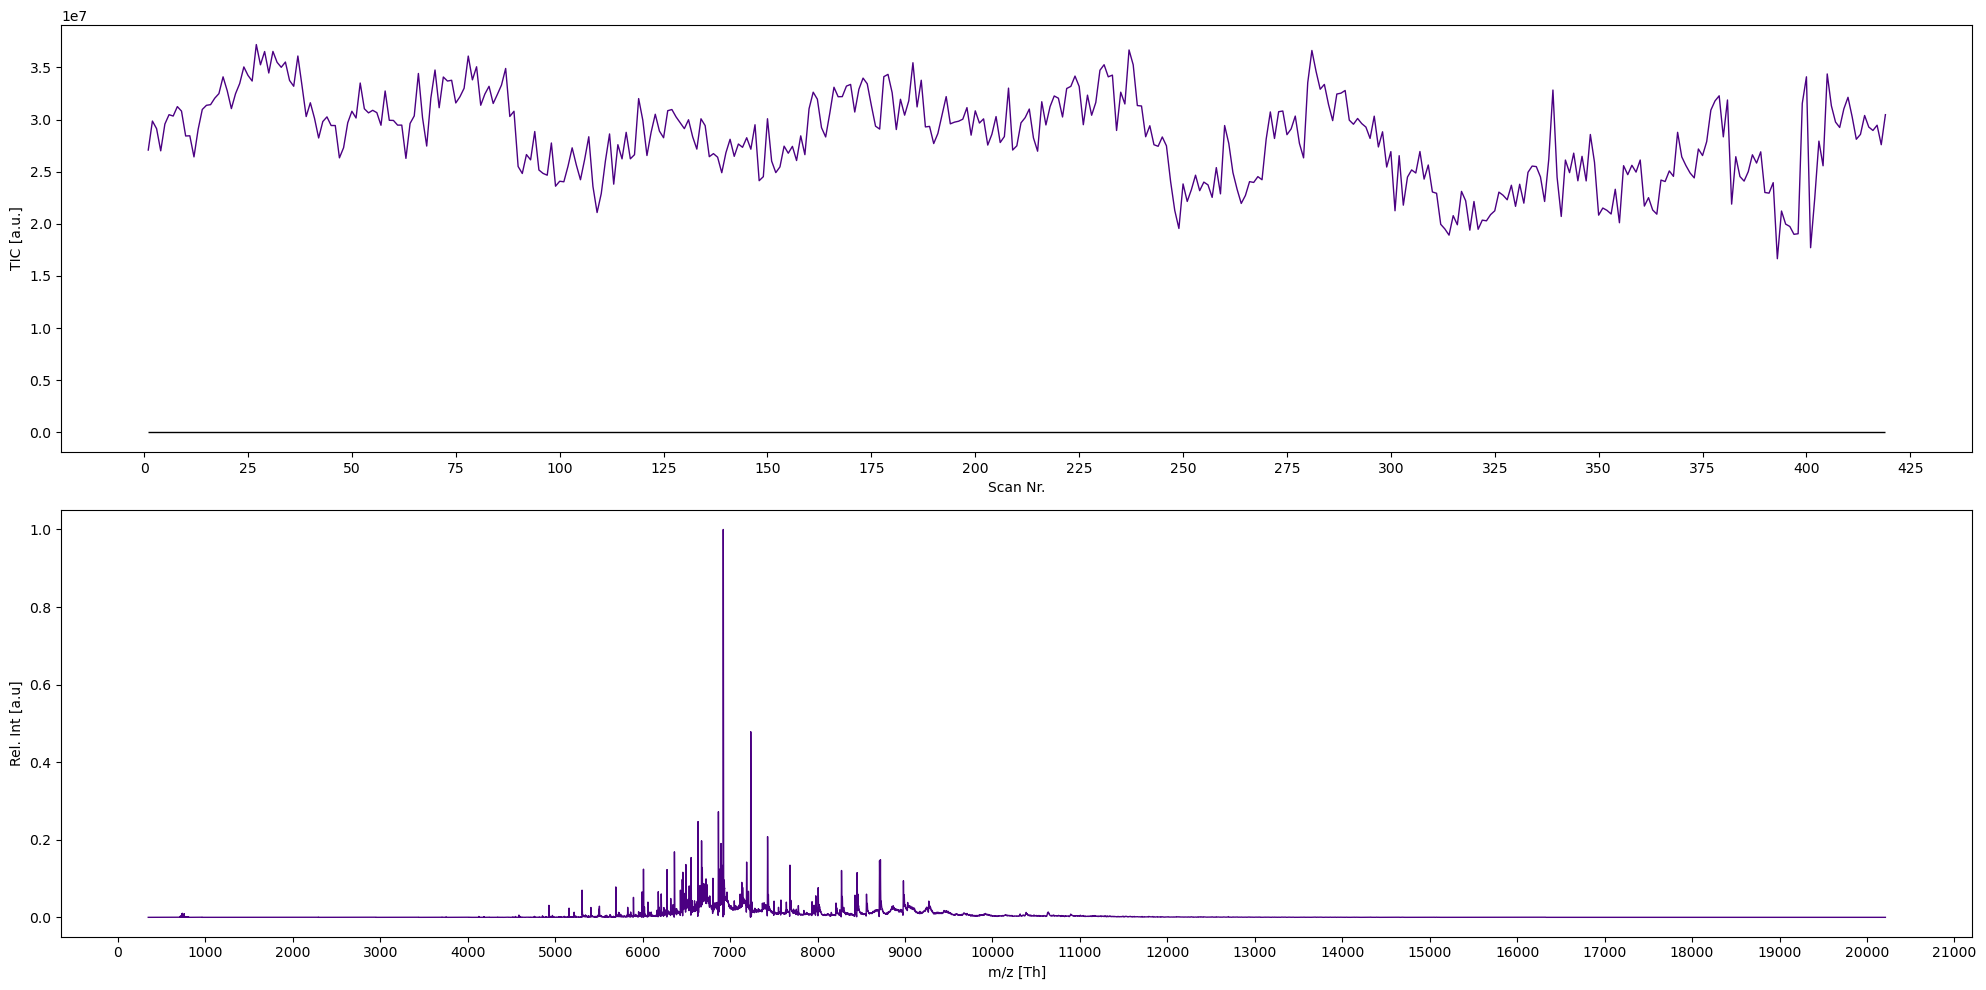

In [65]:
extractor=SpectraExtractor(load_file)

extractor.get_average_spec()

fig1,ax=plt.subplots(2,1, figsize=(20,10))
extractor.plot_chromatogram(plot_time=False,ax=ax[0])
extractor.plot_spectrum(zoom=None,ax=ax[1])
fig1.tight_layout()


In [66]:
folder=make_output_folder(
    data_in=load_file,
    folder_name=output_folder
)
fig1.savefig(f"{folder}/spectrum_wide.png",dpi=300)
extractor.save_spectrum(folder)

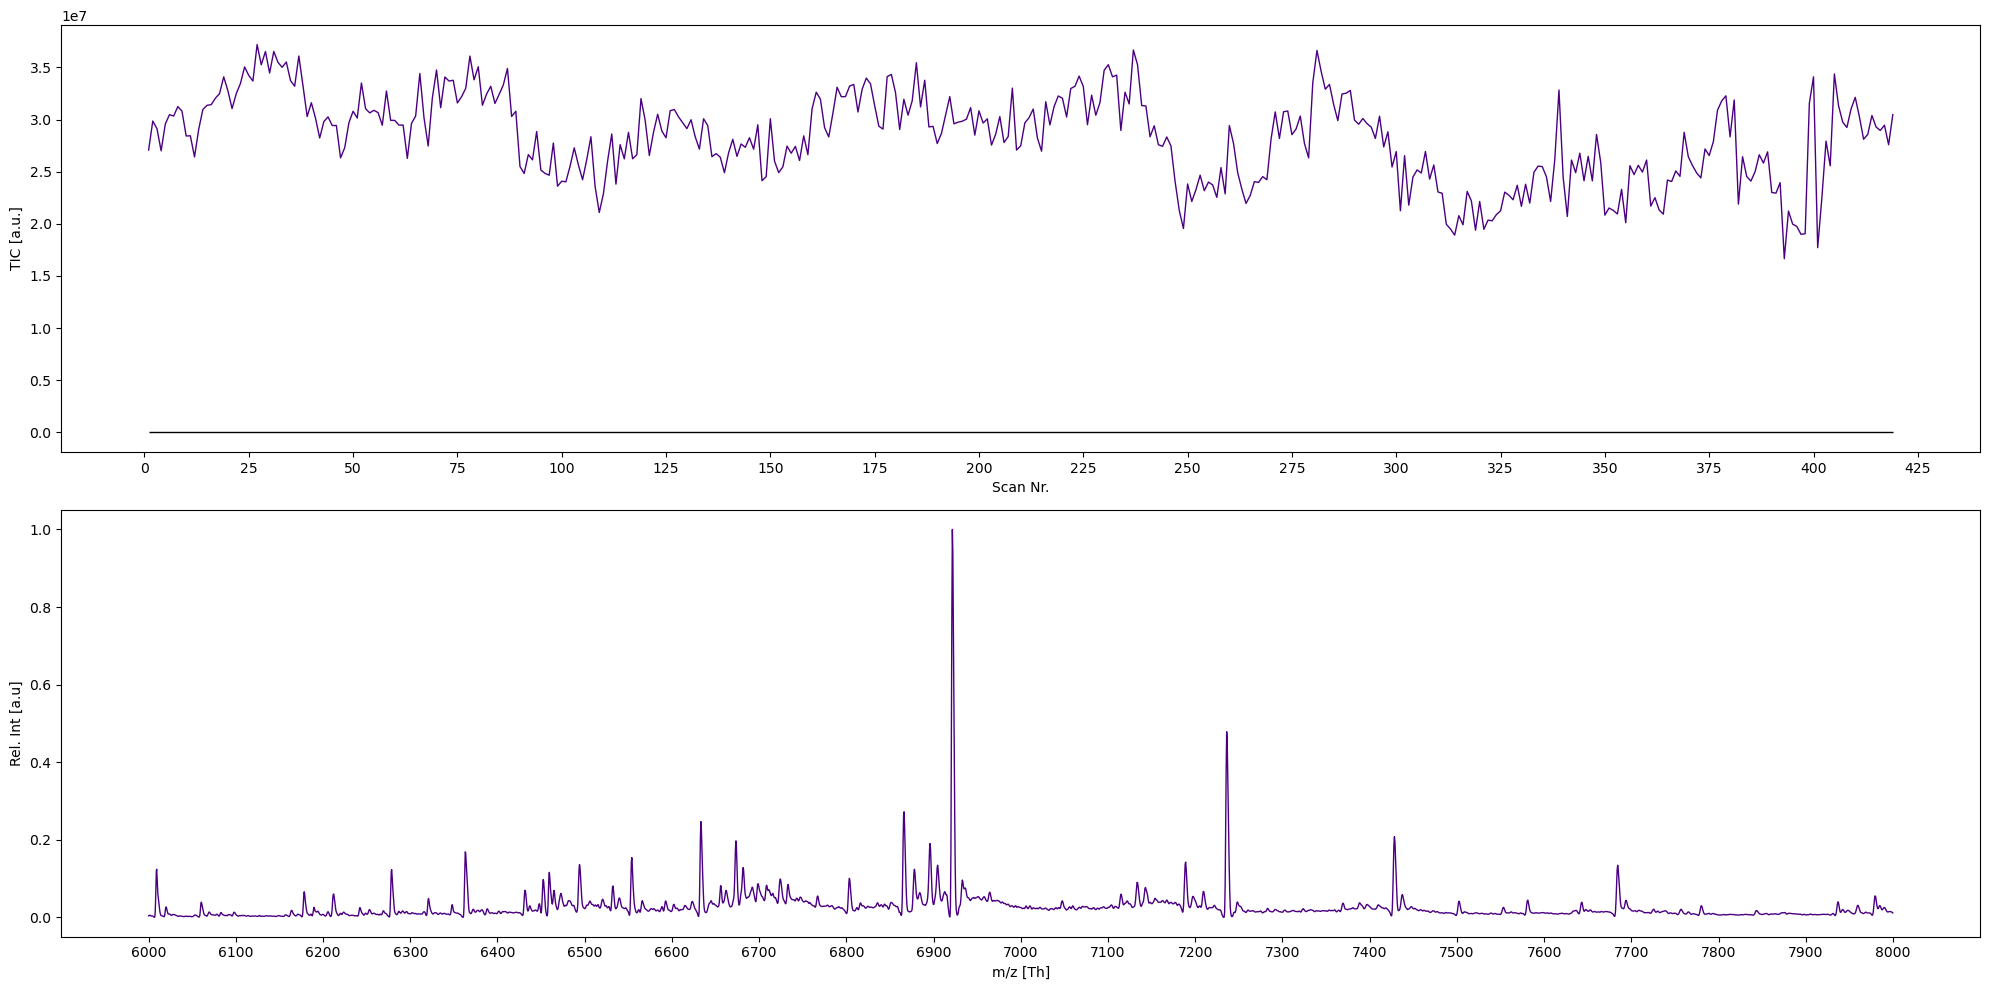

In [67]:
fig2,ax=plt.subplots(2,1, figsize=(20,10))
extractor.plot_chromatogram(plot_time=False,ax=ax[0])
extractor.plot_spectrum(zoom=[6000,8000],ax=ax[1])
fig2.tight_layout()
fig2.savefig(f"{folder}/spectrum_zoom.png",dpi=300)

In [68]:
unidec=UnidecInterface(
    data_in=glob(f"{folder}/*_selected_*")[0],
    folder_out=folder
)

unidec.run("config.txt")
unidec.load_results()
df=unidec.get_peak_df()


UniDec Engine v.6.0.4

UniDec Path: c:\Users\chem-chem1918\AppData\Local\miniconda3\envs\nativems\Lib\site-packages\unidec\bin\unidec.exe
Opening File:  ../../../Analyses/Proteasome/20240823/crazy_test\20240821_PA28y_trappressure6_intrap-50_1_selected__range_1-419.txt
Output Directory: c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Analyses\Proteasome\20240823\crazy_test
Loading Time: 0.5s
Data Prep Time: 0.085s
Automatic Peak Width: 2.75227
unidec run 1.9s
File Name:  ../../../Analyses/Proteasome/20240823/crazy_test\20240821_PA28y_trappressure6_intrap-50_1_selected__range_1-419.txt R Squared:  0.9515762848950143
R Squared: 0.9515762848950143
Average Peaks Score (UniScore): 0.3837720986555618
Exported data to c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Analyses\Proteasome\20240823\crazy_test\20240821_PA28y_trappressure6_intrap-50_1_selected__range_1-419_unidec_chargedata.dat
Exported data to c:\Users\chem-chem191

Mass,MassStdGuess,Area,MassCentroid,DScore
108150.0,49.3,20.6,108154.2,0.6
159180.0,62.3,78.8,159179.5,0.4
206840.0,82.4,78.5,206845.1,0.3
222820.0,84.5,69.6,222820.6,0.4
248190.0,93.2,64.6,248194.8,0.1
267730.0,104.8,41.7,267736.1,0.2
287360.0,92.2,100.0,287363.6,0.4


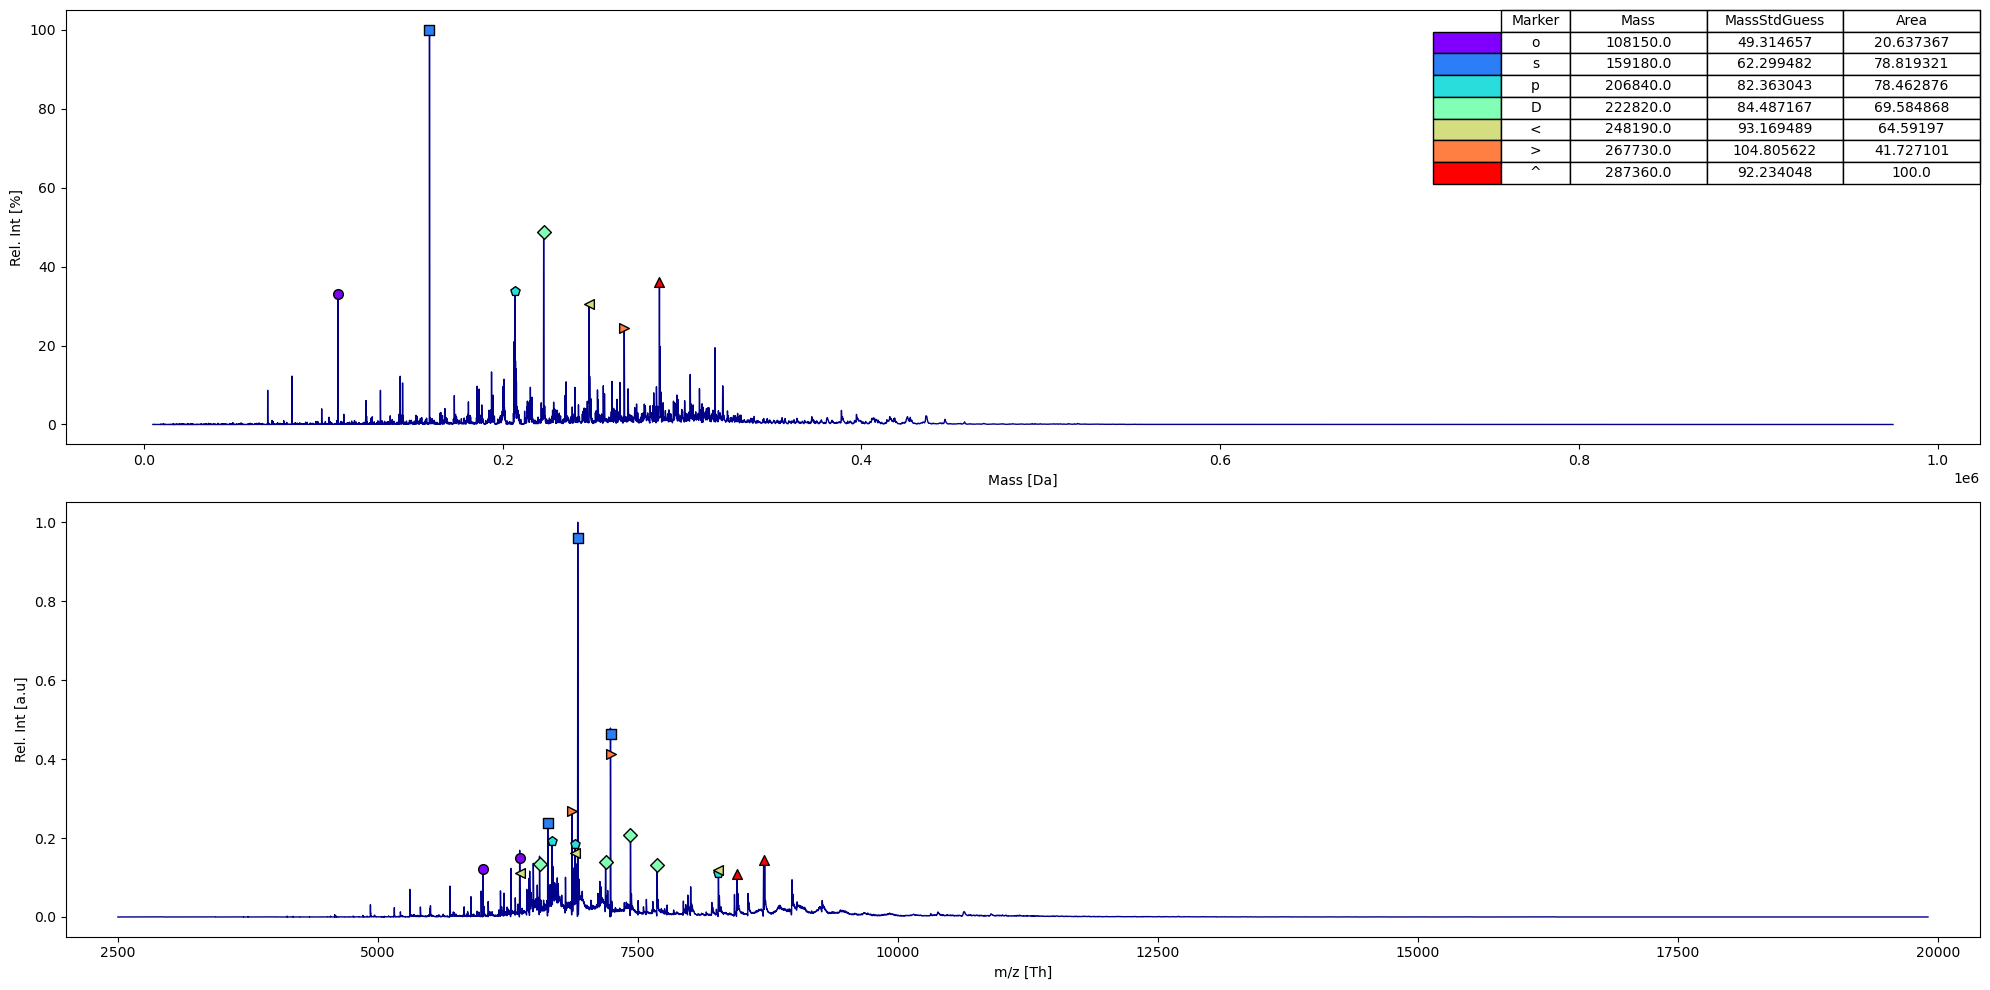

In [69]:
fig3,ax=plt.subplots(2,1, figsize=(20,10))
unidec.plot_mass_data(
    ax=ax[0],
    zoom=None
)
unidec.plot_mz_data(
    ax=ax[1],
    zoom=None,
    threshold=0.1
)

unidec.plot_table(ax[0])
fig3.tight_layout()
fig3.savefig(f"{folder}/unidec_results_wide.png",dpi=300)

df.drop(columns=["AvgCharge","StdDevCharge","Height","MassFWHM","MassErrorBetweenZ","Marker"]).style.hide(axis='index').format(precision=1)

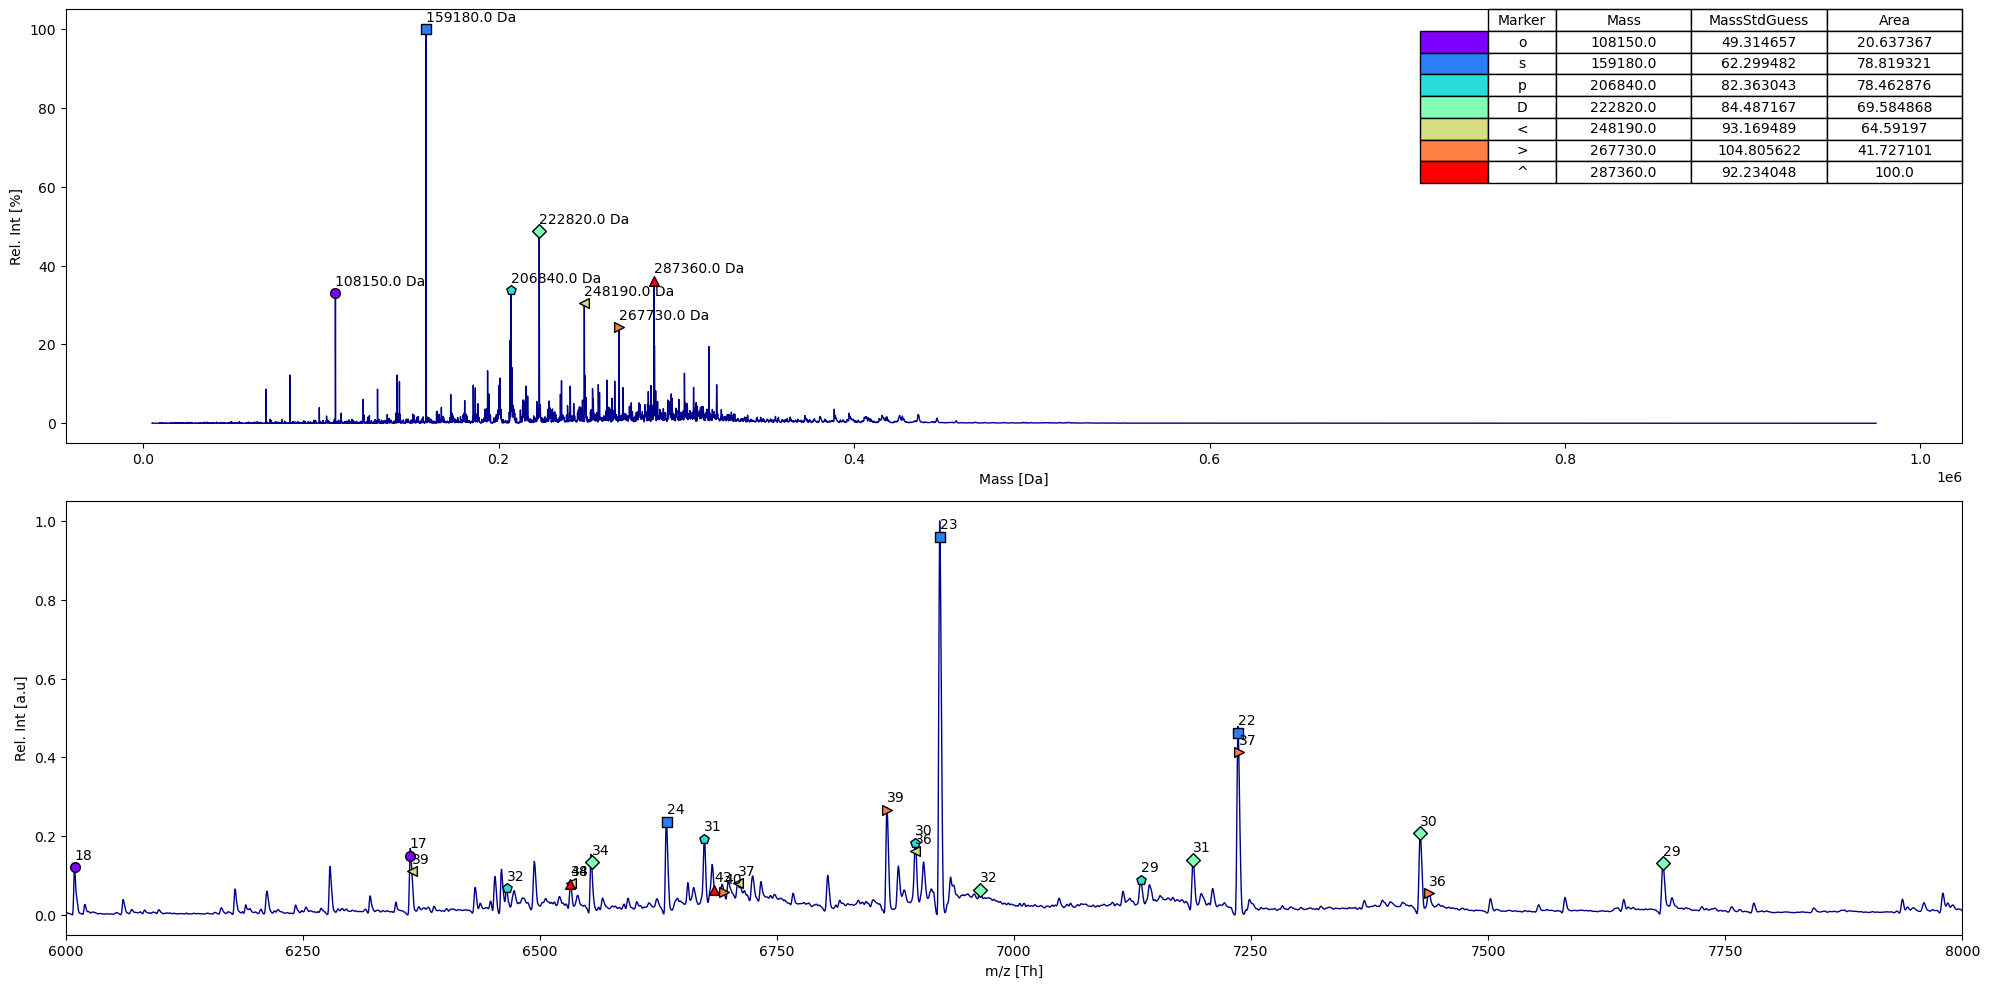

In [70]:
fig4,ax=plt.subplots(2,1, figsize=(20,10))
unidec.plot_mass_data(
    ax=ax[0],
    zoom=None,
    display_masses=True
)
unidec.plot_mz_data(
    ax=ax[1],
    zoom=[6000,8000],
    threshold=0.05,
    display_charges=True
)

unidec.plot_table(ax[0])
fig4.tight_layout()
fig4.savefig(f"{folder}/unidec_results_zoom.png",dpi=300)


In [71]:
get_likely_composition(
    array=[29506],
    mass=159180,
    no_subunits=20,
    max_mutliplicates=20,
    tolerance=50000
)

,29506,sum,diff
5,5,147530,11650
6,6,177036,17856
4,4,118024,41156
7,7,206542,47362


In [72]:
# # Random stuff

# error_h=[303,352,391,430]
# error_nh4=[-197,-158,-129,-90]
# names=["a3b4","a4b3","a5b2","a6b1"]

# sns.set_theme(style="white", context="talk")
# fig,ax=plt.subplots(figsize=(5,5))
# g1=sns.barplot(x=names,y=error_h,ax=ax,label="Hydrogen Adduct",color="salmon",width=0.3)
# g2=sns.barplot(x=names,y=error_nh4,ax=ax, label="Ammonium Adduct", color="royalblue",width=0.3)
# ax.axhline(0, color="k", clip_on=False)
# ax.set(ylabel="Error [Da]", ylim=[-500,500])
# sns.despine(bottom=True)
# plt.tight_layout(h_pad=2)
